In [59]:
import pandas as pd
df = pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [60]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [61]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
gender,M,M,M,M,M,F,M,M,F,F,...,M,M,M,M,F,F,F,F,F,F
NationalITy,KW,KW,KW,KW,KW,KW,KW,KW,KW,KW,...,Palestine,Palestine,Palestine,Palestine,Jordan,Jordan,Jordan,Jordan,Jordan,Jordan
PlaceofBirth,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,KuwaIT,...,Jordan,Jordan,Palestine,Palestine,Jordan,Jordan,Jordan,Jordan,Jordan,Jordan
StageID,lowerlevel,lowerlevel,lowerlevel,lowerlevel,lowerlevel,lowerlevel,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,...,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool
GradeID,G-04,G-04,G-04,G-04,G-04,G-04,G-07,G-07,G-07,G-07,...,G-08,G-08,G-08,G-08,G-08,G-08,G-08,G-08,G-08,G-08
SectionID,A,A,A,A,A,A,A,A,A,B,...,A,A,A,A,A,A,A,A,A,A
Topic,IT,IT,IT,IT,IT,IT,Math,Math,Math,IT,...,History,History,Geology,Geology,Chemistry,Chemistry,Geology,Geology,History,History
Semester,F,F,F,F,F,F,F,F,F,F,...,F,S,F,S,F,S,F,S,F,S
Relation,Father,Father,Father,Father,Father,Father,Father,Father,Father,Father,...,Father,Father,Father,Father,Father,Father,Father,Father,Father,Father
raisedhands,15,20,10,30,40,42,35,50,12,70,...,81,78,80,85,2,5,50,55,30,35


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

레이블 인코딩

In [63]:
features = []
for i in range(len(df.columns)):
    if type(df[df.columns[i]][0]) == str:
        features.append(df.columns[i])
features

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

def encode_features(DF):
    for feature in features:
        le = LabelEncoder()
        DF[feature] = le.fit_transform(DF[feature])
    return DF

df = encode_features(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
gender,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,0,0,0,0,0,0
NationalITy,4,4,4,4,4,4,4,4,4,4,...,7,7,7,7,3,3,3,3,3,3
PlaceofBirth,4,4,4,4,4,4,4,4,4,4,...,3,3,7,7,3,3,3,3,3,3
StageID,2,2,2,2,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GradeID,1,1,1,1,1,1,4,4,4,4,...,5,5,5,5,5,5,5,5,5,5
SectionID,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Topic,7,7,7,7,7,7,8,8,8,7,...,6,6,5,5,2,2,5,5,6,6
Semester,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
Relation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
raisedhands,15,20,10,30,40,42,35,50,12,70,...,81,78,80,85,2,5,50,55,30,35


상관관계 분석

In [65]:
df.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.023653,-0.064895,-0.017793,0.016869,0.054907,0.031769,0.049156,-0.195142,-0.149978,-0.210932,-0.052139,-0.124703,-0.022359,-0.093478,-0.209011,0.123675
NationalITy,-0.023653,1.000000,0.786798,-0.139212,0.124049,0.069712,0.076718,0.070503,0.003212,0.111533,0.028793,0.062827,-0.063386,0.079380,-0.001701,0.157116,-0.077785
PlaceofBirth,-0.064895,0.786798,1.000000,-0.176368,0.174026,0.085178,0.143477,0.078554,0.031632,0.077986,0.033798,0.078636,0.006262,0.040887,-0.094594,0.134554,-0.098975
StageID,-0.017793,-0.139212,-0.176368,1.000000,-0.961835,0.296416,-0.047493,-0.029512,0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,-0.112536,-0.011696
GradeID,0.016869,0.124049,0.174026,-0.961835,1.000000,-0.303949,0.061389,0.066079,-0.033602,0.182621,0.078262,0.183033,0.168462,0.118246,-0.018421,0.088342,0.013483
SectionID,0.054907,0.069712,0.085178,0.296416,-0.303949,1.000000,0.267445,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,0.037062,0.017597
Topic,0.031769,0.076718,0.143477,-0.047493,0.061389,0.267445,1.000000,-0.035975,-0.139487,-0.080418,-0.118144,-0.063856,0.054064,0.004730,-0.064087,-0.036537,0.103610
Semester,0.049156,0.070503,0.078554,-0.029512,0.066079,0.046763,-0.035975,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,0.072462,-0.043287
Relation,-0.195142,0.003212,0.031632,0.034205,-0.033602,0.005783,-0.139487,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,0.219687,-0.272111
raisedhands,-0.149978,0.111533,0.077986,-0.172751,0.182621,-0.143862,-0.080418,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,0.463882,-0.231016


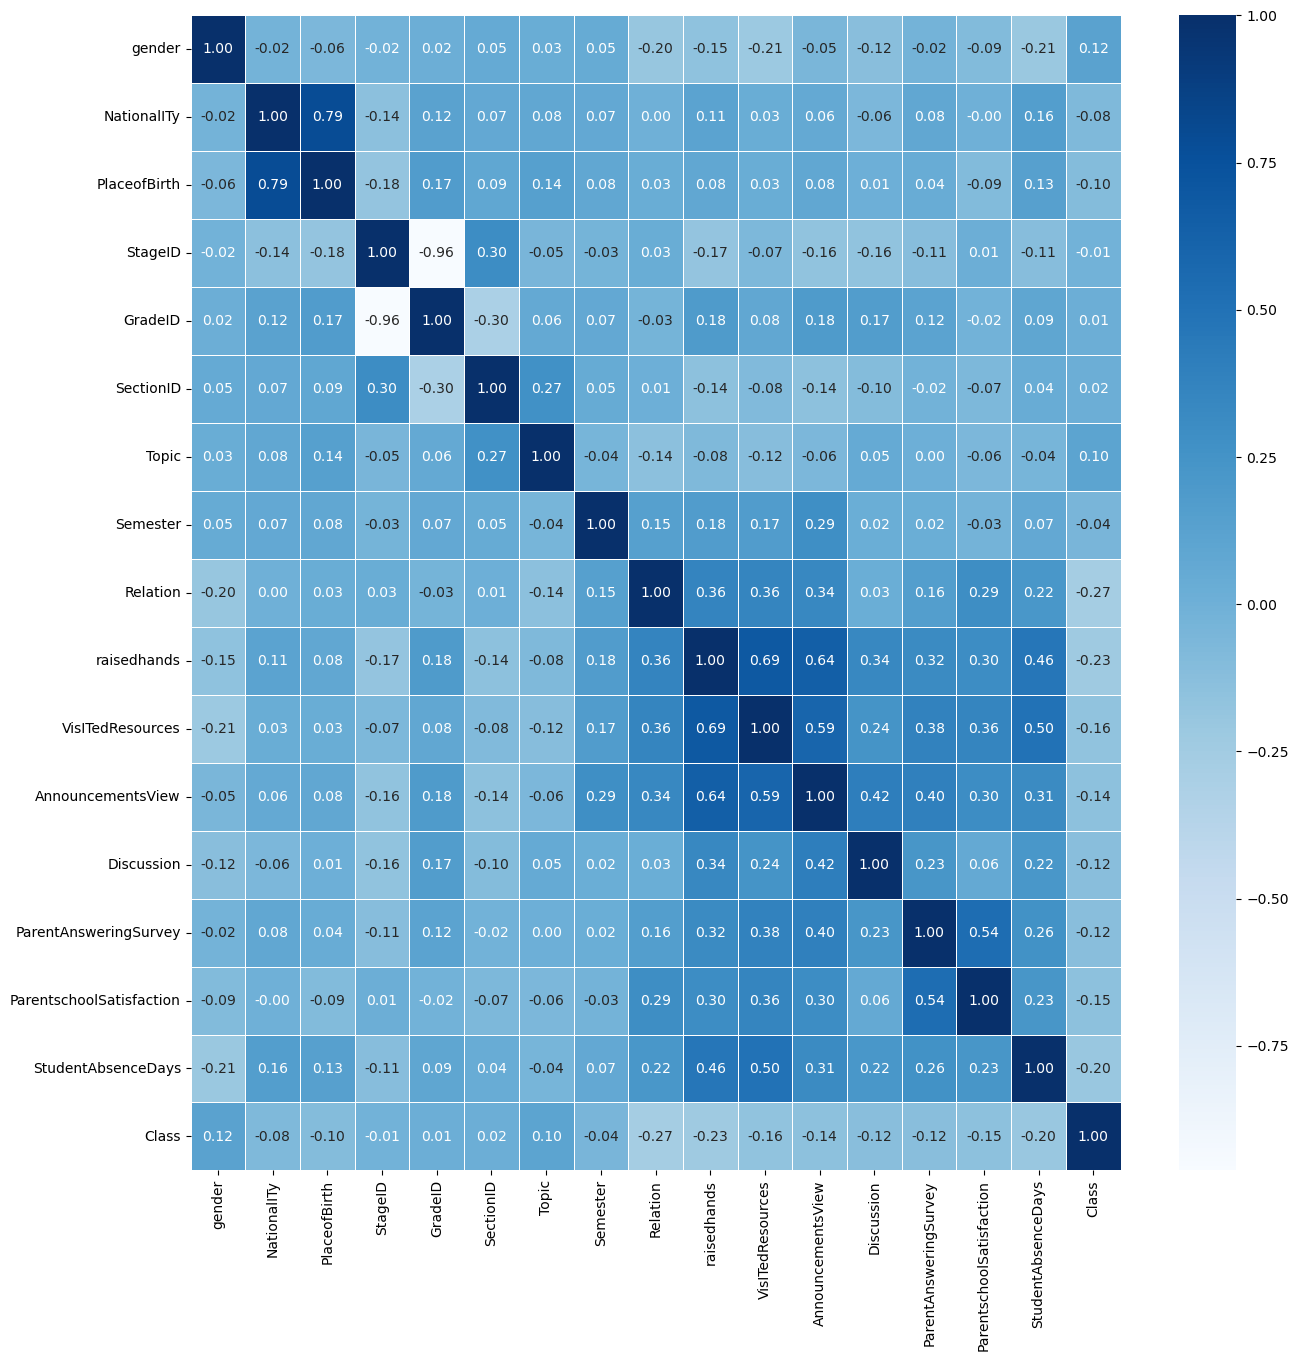

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

분류 시작

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

xgb = XGBClassifier(randon_state=42)
xgb.fit(x_train, y_train)
xgb_pred=xgb.predict(x_test)
print(f'정확도:{(xgb_pred == y_test).mean() * 100:.2f}%')

c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


정확도:76.10%


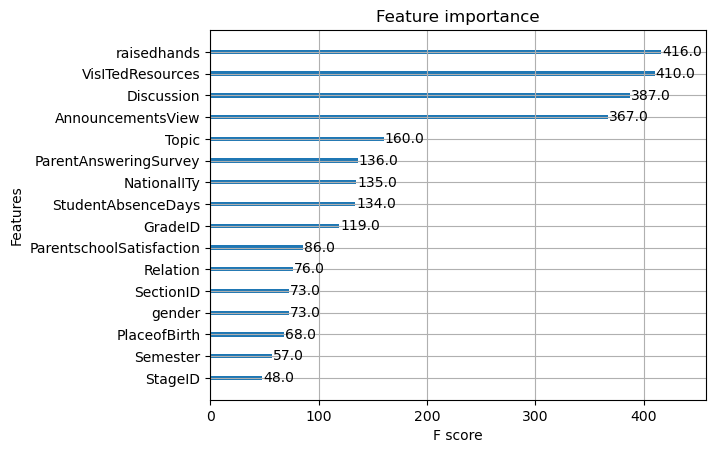

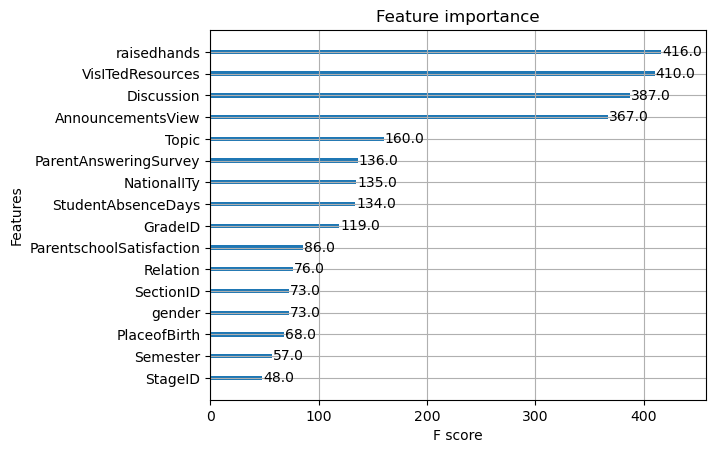

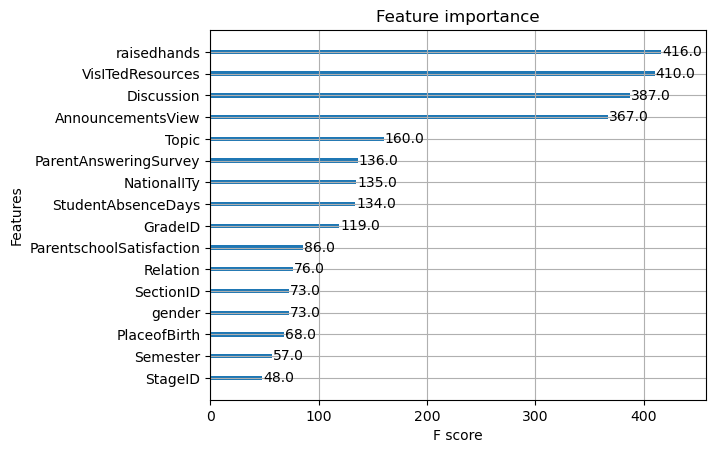

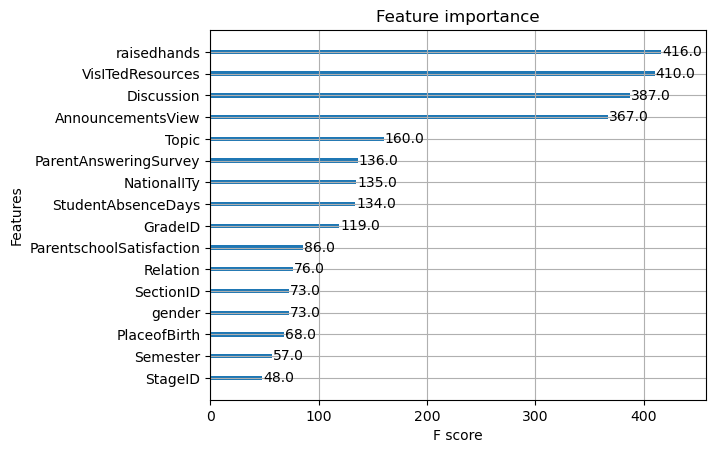

In [76]:
from xgboost import plot_importance
ax = plot_importance(xgb)
plt.show()

LGBM 사용

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
print(f'정확도:{(lgbm_pred == y_test).mean() * 100:.2f}%')


정확도:78.62%


평가 수행

In [98]:
xgb_pred_proba = xgb.predict_proba(x_test)
lgbm_pred_proba = lgbm.predict_proba(x_test)

In [99]:
print(len(set(y)))  # 클래스 개수 확인

3


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve


def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')  # 'macro'도 가능
    recall = recall_score(y_test, pred, average='weighted')  # 'macro'도 가능
    f1 = f1_score(y_test, pred, average='weighted')  # 'macro'도 가능
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')  # 다중 클래스 AUC 설정

    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')

# 평가 수행
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

오차 행렬
[[37  1  5]
 [ 1 36  4]
 [15 12 48]]
정확도: 0.7610, 정밀도: 0.7755, 재현율: 0.7610, F1: 0.7578, AUC: 0.9028


In [101]:
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차 행렬
[[36  1  6]
 [ 1 36  4]
 [10 12 53]]
정확도: 0.7862, 정밀도: 0.7934, 재현율: 0.7862, F1: 0.7850, AUC: 0.9068


하이퍼 파라미터 튜닝

In [102]:
params = {
'n_estimators': [200, 500, 1000, 2000],
'learning_rate': [0.1, 0.05, 0.01],
'max_depth': [6, 7, 8],
'colsample_bytree': [0.8, 0.9, 1.0],
'subsample': [0.8, 0.9, 1.0],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(XGBClassifier(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.8}

In [105]:
xgb_best = XGBClassifier(colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8, randon_state=42)
xgb_best.fit(x_train, y_train)
xgbest_pred=xgb_best.predict(x_test)
xgbest_pred_proba = xgb_best.predict_proba(x_test)
get_clf_eval(y_test, xgbest_pred, xgbest_pred_proba)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:55:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randon_state" } are not used.

  warnings.warn(smsg, UserWarning)


오차 행렬
[[39  1  3]
 [ 1 35  5]
 [ 9 11 55]]
정확도: 0.8113, 정밀도: 0.8191, 재현율: 0.8113, F1: 0.8104, AUC: 0.9163


In [104]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LGBMClassifier(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.8}

In [106]:
lgbm_best = LGBMClassifier(random_state=42, verbose=-1, colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 7, n_estimators= 200, subsample= 0.8)
lgbm_best.fit(x_train, y_train)
lgbmB_pred = lgbm_best.predict(x_test)
lgbmB_pred_proba = lgbm_best.predict_proba(x_test)
get_clf_eval(y_test, lgbmB_pred, lgbmB_pred_proba)

오차 행렬
[[37  1  5]
 [ 1 35  5]
 [11 13 51]]
정확도: 0.7736, 정밀도: 0.7828, 재현율: 0.7736, F1: 0.7719, AUC: 0.9092


GBT 사용

In [109]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
gbr_pred_proba = gbr.predict_proba(x_test)
get_clf_eval(y_test, gbr_pred, gbr_pred_proba)

오차 행렬
[[36  1  6]
 [ 1 37  3]
 [13 11 51]]
정확도: 0.7799, 정밀도: 0.7904, 재현율: 0.7799, F1: 0.7778, AUC: 0.9084


In [110]:
params = {
'n_estimators': [200, 500, 1000, 2000],
'learning_rate': [0.1, 0.05, 0.01],
'subsample': [0.8, 0.9, 1.0],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.8}

In [112]:
gbr_best = GradientBoostingClassifier(random_state=42, learning_rate= 0.01, n_estimators= 500, subsample= 0.8)
gbr_best.fit(x_train, y_train)
gbrB_pred = gbr_best.predict(x_test)
gbrB_pred_proba = gbr_best.predict_proba(x_test)
get_clf_eval(y_test, gbrB_pred, gbrB_pred_proba)

오차 행렬
[[36  0  7]
 [ 1 36  4]
 [10 11 54]]
정확도: 0.7925, 정밀도: 0.7965, 재현율: 0.7925, F1: 0.7912, AUC: 0.9135


평가 종합

In [117]:
models = [xgb_pred, xgbest_pred, lgbm_pred, lgbmB_pred, gbr_pred, gbrB_pred]
proba = [xgb_pred_proba, xgbest_pred_proba, lgbm_pred_proba, lgbmB_pred_proba, gbr_pred_proba, gbrB_pred_proba]
for i, a in zip(models, proba):
    get_clf_eval(y_test, i, a)

오차 행렬
[[37  1  5]
 [ 1 36  4]
 [15 12 48]]
정확도: 0.7610, 정밀도: 0.7755, 재현율: 0.7610, F1: 0.7578, AUC: 0.9028
오차 행렬
[[39  1  3]
 [ 1 35  5]
 [ 9 11 55]]
정확도: 0.8113, 정밀도: 0.8191, 재현율: 0.8113, F1: 0.8104, AUC: 0.9163
오차 행렬
[[36  1  6]
 [ 1 36  4]
 [10 12 53]]
정확도: 0.7862, 정밀도: 0.7934, 재현율: 0.7862, F1: 0.7850, AUC: 0.9068
오차 행렬
[[37  1  5]
 [ 1 35  5]
 [11 13 51]]
정확도: 0.7736, 정밀도: 0.7828, 재현율: 0.7736, F1: 0.7719, AUC: 0.9092
오차 행렬
[[36  1  6]
 [ 1 37  3]
 [13 11 51]]
정확도: 0.7799, 정밀도: 0.7904, 재현율: 0.7799, F1: 0.7778, AUC: 0.9084
오차 행렬
[[36  0  7]
 [ 1 36  4]
 [10 11 54]]
정확도: 0.7925, 정밀도: 0.7965, 재현율: 0.7925, F1: 0.7912, AUC: 0.9135


점수 시각화

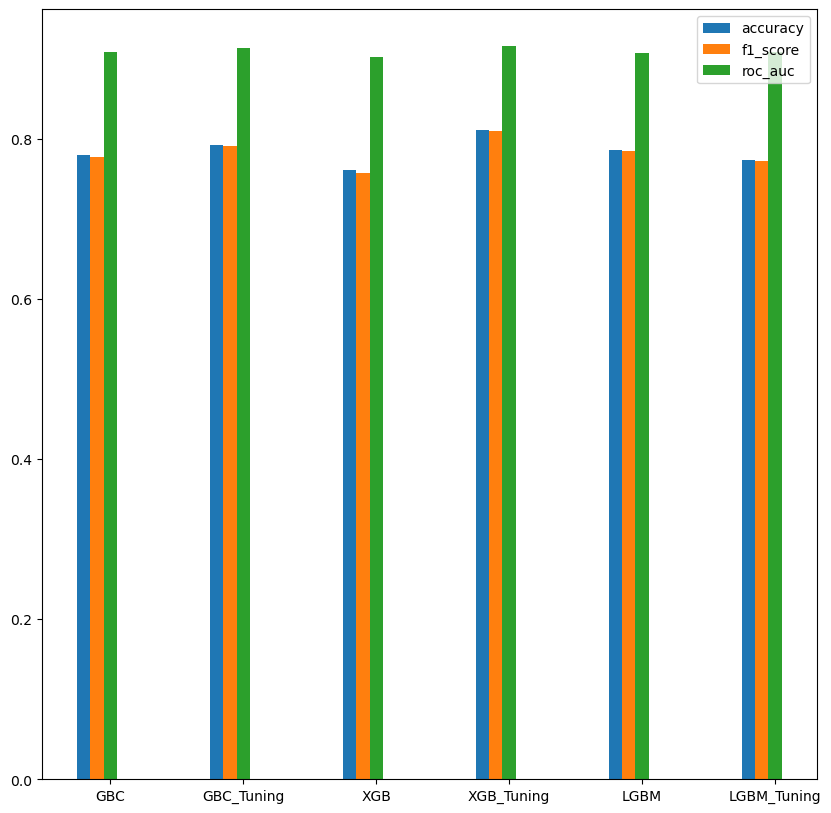

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

acc_list = []
f1_list = []
auc_list = []

def clf_eval_plt(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')  # 'macro'도 가능
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')  # 다중 클래스 AUC 설정
    acc_list.append(accuracy)
    f1_list.append(f1)
    auc_list.append(roc_auc)

def drow_plt():
    barwidth=0.1
    n = len(acc_list)
    index = np.arange(n)
    plt.figure(figsize=(10, 10))
    plt.bar(index, acc_list, width=barwidth, tick_label = model_name)
    plt.bar(index+barwidth, f1_list, width=barwidth, tick_label = model_name)
    plt.bar(index+barwidth*2, auc_list, width=barwidth, tick_label = model_name)
    plt.legend(['accuracy','f1_score','roc_auc'])
    plt.show()

model_name = ['GBC', 'GBC_Tuning','XGB','XGB_Tuning','LGBM','LGBM_Tuning']
models = [gbr_pred, gbrB_pred, xgb_pred, xgbest_pred, lgbm_pred, lgbmB_pred]
proba = [gbr_pred_proba, gbrB_pred_proba, xgb_pred_proba, xgbest_pred_proba, lgbm_pred_proba, lgbmB_pred_proba]
for i, a in zip(models, proba):
    clf_eval_plt(y_test, i, a)
drow_plt()

최적 모델 출력

In [147]:
for i in [acc_list, f1_list, auc_list]:
    print(model_name[i.index(max(i))])
    print(max(i))

XGB_Tuning
0.8113207547169812
XGB_Tuning
0.8103947597384841
XGB_Tuning
0.9163075453171269
